# Subplots

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Creating subplots manually

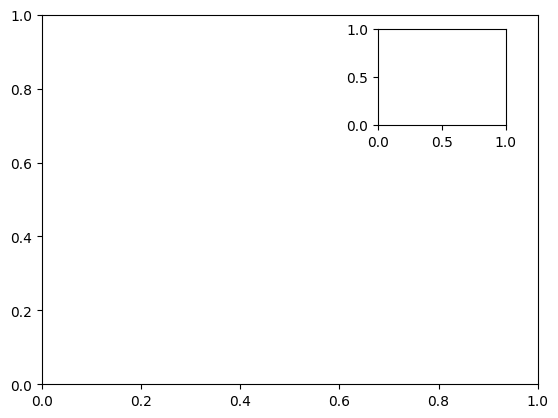

In [13]:
# standard axes
ax1 = plt.axes()  

# New axis with [left, bottom, width, height]
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

Or we could use `plt.figure.add_axes()`

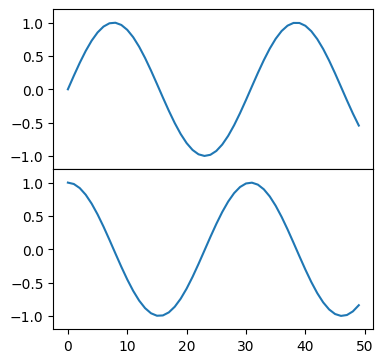

In [11]:
fig = plt.figure(figsize=(4,4))

ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

## Creating subplots using `plt.subplot()`

<br>

Matplotlib has the concept of subplots: 
<br>**groups of smaller axes that can exist together within a single figure**
 
- We use `plt.subplot(m, n, index)` to get `m x n` subplots
- To access each of them, we use the `index` parameter
- The index goes from left to right top to bottom.

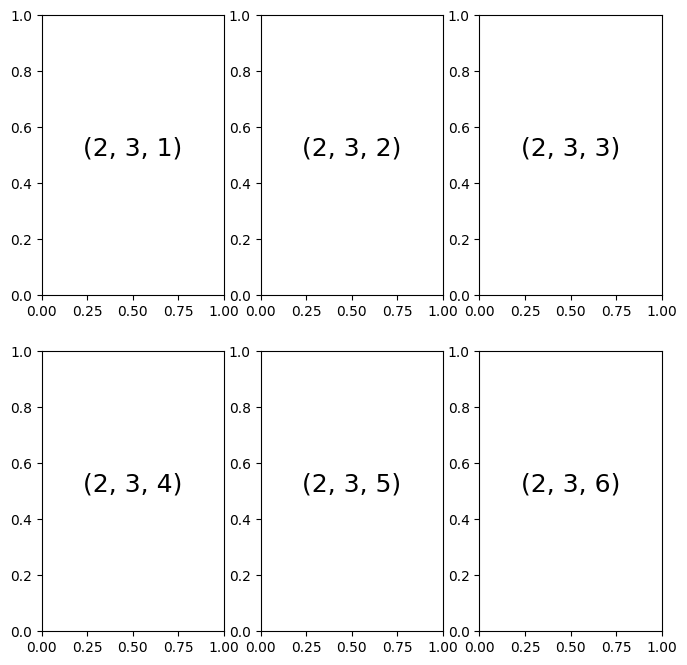

In [22]:
plt.figure(figsize=(8, 8))
for i in range(1, 7):
    
    plt.subplot(2, 3, i)
    
    plt.text(0.5, 0.5, 
             str((2, 3, i)),
             fontsize=18, 
             ha='center'
    )

**Example**

Plot the following curves, each in a separate plot : 

- $y = \ln x, x \in [e^2, e^3]$
- $y = e^x, x \in [0, 3]$
- $y = \sin(x), x \in [0, 2\pi]$
- $y = \frac {1} {x} , x \in [0, 5]$

**Note**

- `plt.rcParams` : You can dynamically change the default rc (runtime configuration) settings in a python script or interactively from the python shell. All rc settings are stored in a dictionary-like variable called matplotlib.rcParams, which is global to the matplotlib package

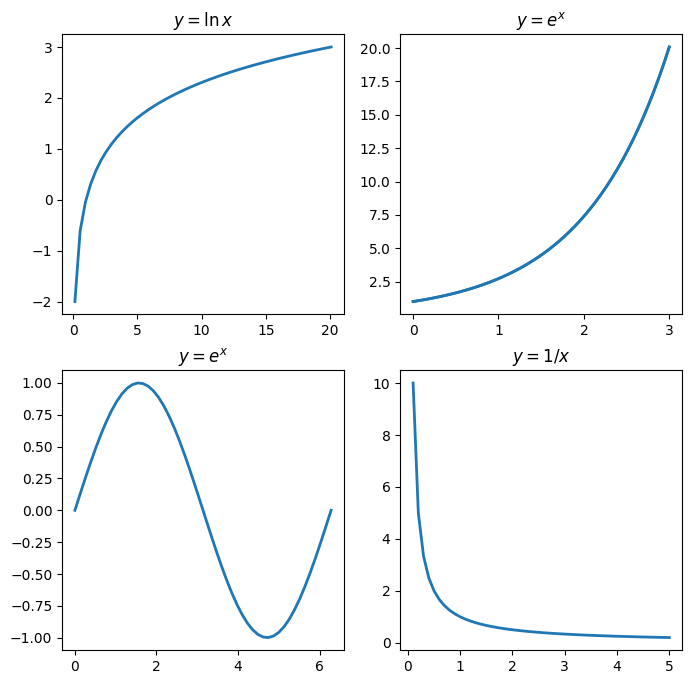

In [24]:
plt.rcParams["figure.figsize"] = [8, 8]
plt.rcParams["lines.linewidth"] = 2

# We can specify a list of colors to cycle automatically too
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["#1f77b4"]) 


# Plot y = ln(x)
plt.subplot(2, 2, 1)

x = np.linspace(1 / np.e**2, np.e**3)
y = np.log(x)

plt.plot(x, y)
plt.title("$y = \ln x$")

# Plot y = e^x
plt.subplot(2, 2, 2)

x = np.linspace(0, 3)
y = np.exp(x)

plt.plot(x, y)
plt.title("$y = e^x$")

# Plot y = e^x
plt.subplot(2, 2, 2)

x = np.linspace(0, 3)
y = np.exp(x)

plt.plot(x, y)
plt.title("$y = e^x$")

# Plot y = sin(x)
plt.subplot(2, 2, 3)

x = np.linspace(0, 2 * np.pi)
y = np.sin(x)

plt.plot(x, y)
plt.title("$y = e^x$")

# Plot y = 1/x
plt.subplot(2, 2, 4)

x = np.linspace(0.1, 5) # 0-divsion error. So, we start from 0.001
y = 1 / x

plt.plot(x, y)
plt.title("$y = 1/x$");

## Creating all subplots in one go using `plt.subplots()`

- The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots. 
- For this purpose, plt.subplots() is the easier tool to use (note the s at the end of subplots). 
- Rather than creating a single subplot, this function **creates a full grid of subplots in a single line, returning them in a NumPy array.**
- **Axes are in a two-dimensional array, indexed by [row, col]**

**Note :** Note that by specifying `sharex` and `sharey`, we've automatically removed inner labels on the grid to make the plot cleaner. 

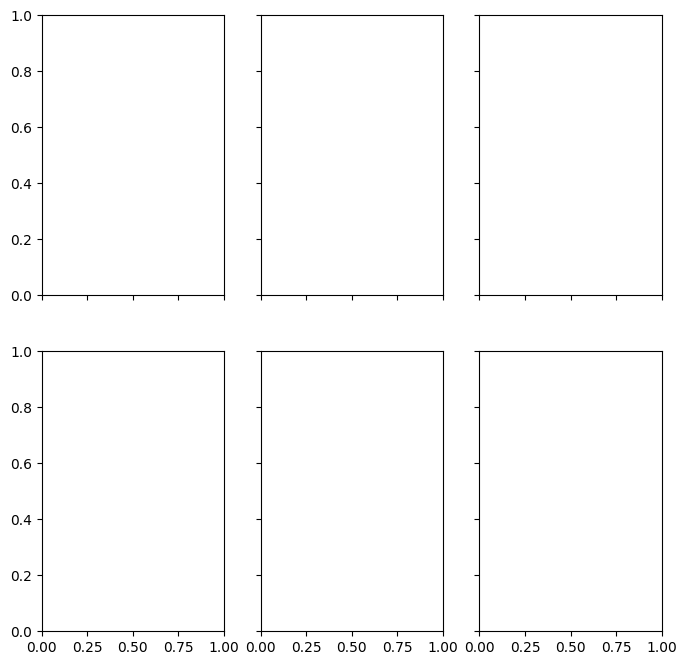

In [25]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

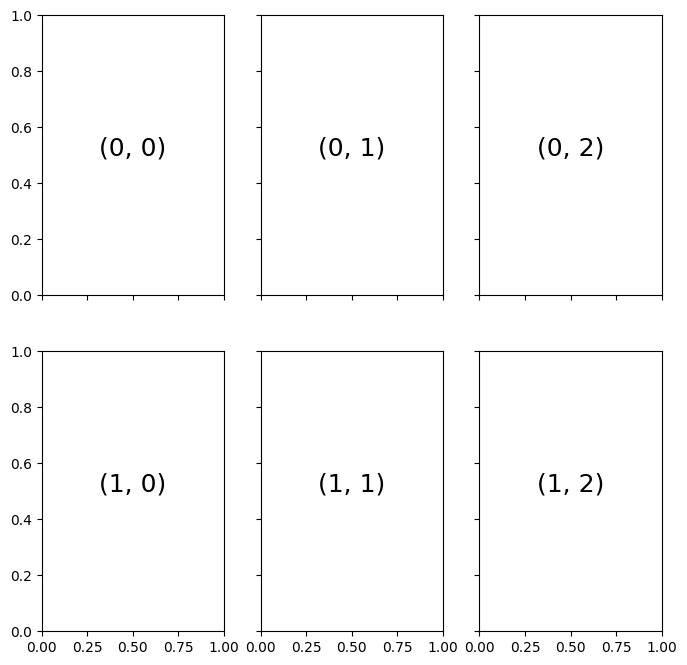

In [26]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

## Complicated arrangements using `plt.gridSpec()`

- To go beyond a regular grid to subplots that span multiple rows and columns, plt.GridSpec() is the best tool.
- The plt.GridSpec() object **does not create a plot by itself**
- It is simply a **convenient interface that is recognized by the plt.subplot() command**

In [28]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

**From this we can specify subplot locations and extents using the familiary Python slicing syntax**

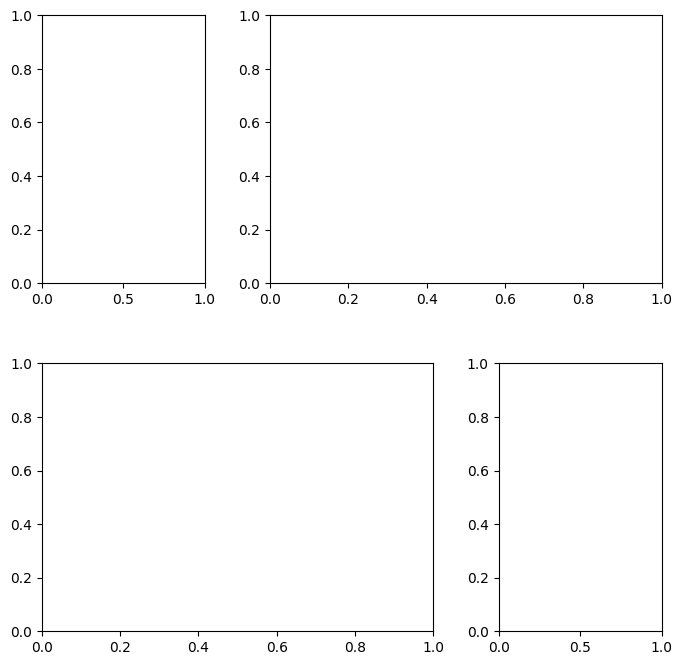

In [29]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

**Example**

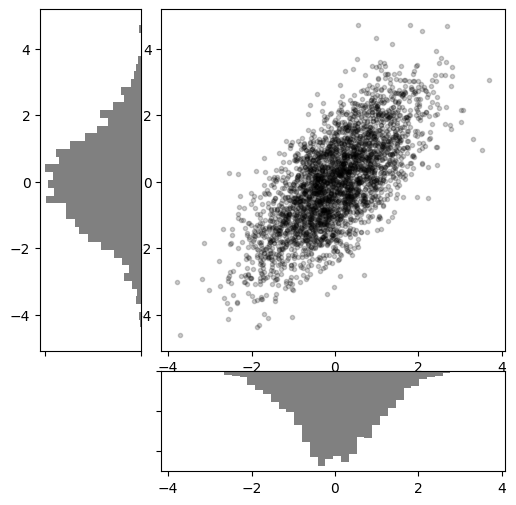

In [30]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

## References

[Jakevdp's Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)